# Sobre o algoritmo Rank to Page

O intuito desse jupyter notebook é desenvolver da melhor forma, o algoritmo de rank de grafo, tendo como base o algoritmo de Stanford, criado por Larry Page (PageRank), utilizado para ranquear as páginas mais relevantes da Web, feito pelo Google.

----------------
Bibliotecas

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

-----------------------
Criando Grafo com arestas

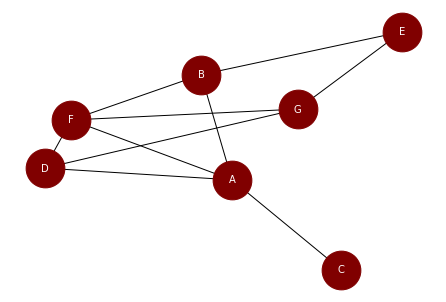

In [13]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), 
                  ('B', 'E'), ('B', 'F'), ('F', 'D'), 
                  ('D', 'G'), ('E', 'G'), ('F', 'G'),
                  ('G', 'E'), ('F', 'B'), ('F', 'A')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='#800000',
        edge_color='black', font_size=10, font_color='white')

----------------
Criando matriz para melhorar a visualização e a utilização do grafo, dos nós e arestas.

[[0. 1. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 0.]]


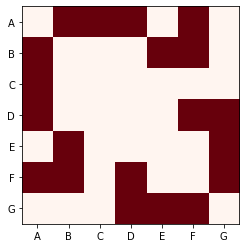

In [14]:
matriz = nx.to_numpy_matrix(G)
for i in range(len(matriz)):
    for j in range(len(matriz)):
        if G.has_edge(i, j):
            matriz[i][j] = 1

print(matriz)

colunas = ["A", "B", "C", "D", "E", "F", "G"]

plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(colunas)), colunas)
plt.yticks(range(len(colunas)), colunas)
plt.show()


----------------
Calculo de Rank:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [109]:
def rank_to_graph(matriz, rank_nodes):
    list_arestas, list_pr_div = np.zeros(len(matriz)), np.zeros(len(matriz))
    list_rank = np.zeros(len(matriz))

    for i in range(len(matriz)):
        list_arestas = np.append(np.sum(matriz[i]))

    for i in range(len(matriz)):
        list_pr_div = np.append(rank_nodes[i] / list_arestas[i])
    
    for i in range(len(matriz)):
        list_amortecimento_sem_i = np.delete(list_pr_div, i)
        list_rank[i] = ((1 - 0.85) / len(matriz)) + (0.85 * np.sum(list_amortecimento_sem_i))

    return list_rank

rank_initial = [1 / len(matriz) for i in range(len(matriz))]
rank = rank_to_graph(matriz, rank_initial)
print(rank)

plt.bar(range(len(rank)), rank, color='#800000')
plt.xticks(range(len(rank)), colunas)
plt.xlabel('Nós')
plt.show()


TypeError: _append_dispatcher() missing 1 required positional argument: 'values'